<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/VEBET_Ders_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#    Graph formatting

plt.rcParams['font.size'] = 10

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [2]:
#. df adındaki değişkene veri kümesini aktarıyorum

df = pd.read_excel('/content/Veri.xlsx')

df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#. Eksik verileri eleyerek
df.dropna(
          axis = 0,       #. 0: satır sil, 1: sütun sil
          how = 'any',    #. Herhangi veri başlığında eksiği varsa sil: 'any'
          inplace = True  #. Bu eksik veri silinmiş hal kalıcı olsun
          )

#. Betimsel istatistikleri
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7043.0,3521.000000,2033.283305,0.00,1760.5,3521.00,5281.50,7042.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
df.gender = [ int(i == 'Female')
    for i in df.gender ]

df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,0,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,7039,2234-XADUH,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,7040,4801-JZAZL,1,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,0,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df = df.iloc[ : , 2: ]

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,1,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
pd.get_dummies( df )

,gender,SeniorCitizen,tenure,MonthlyCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,1,0,1,29.85,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,34,56.95,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2,53.85,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,45,42.30,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0,2,70.70,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,24,84.80,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
7039,1,0,72,103.20,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
7040,1,0,11,29.60,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
7041,0,1,4,74.40,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [7]:
df[ (df.TotalCharges == ' ') ]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,0,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,1,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,0,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,0,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,0,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,1,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,0,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,1,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.replace( ' ', None, inplace = True )

In [9]:
df[ ['tenure','MonthlyCharges','TotalCharges'] ] = df[ ['tenure','MonthlyCharges','TotalCharges'] ].astype( float )

In [10]:
#. Kukla değişkenli verisyonu df değeri olarak güncelledim
df = pd.get_dummies( df ).astype(float)


#. df'nin içindeki gereksiz/tekrarlanmış sütunları silmek
#.   df'nin sütunlarını listele
df.columns.to_list()

['gender',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'Pa

In [11]:
#. Seçtiğim sütunları yukarıdaki listeden silerek maskeleme

df = df[
['gender',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
#  'Partner_No',
 'Partner_Yes',
#  'Dependents_No',
 'Dependents_Yes',
#  'PhoneService_No',
 'PhoneService_Yes',
#  'MultipleLines_No',
#  'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
#  'InternetService_No',
#  'OnlineSecurity_No',
#  'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
#  'OnlineBackup_No',
#  'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
#  'DeviceProtection_No',
#  'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
#  'TechSupport_No',
#  'TechSupport_No internet service',
 'TechSupport_Yes',
#  'StreamingTV_No',
#  'StreamingTV_No internet service',
 'StreamingTV_Yes',
#  'StreamingMovies_No',
#  'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
#  'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
#  'Churn_No',
 'Churn_Yes']
]

In [12]:
df

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1.0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,2.0,53.85,108.15,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,45.0,42.30,1840.75,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,2.0,70.70,151.65,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,24.0,84.80,1990.50,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7039,1.0,0.0,72.0,103.20,7362.90,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7040,1.0,0.0,11.0,29.60,346.45,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7041,0.0,1.0,4.0,74.40,306.60,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [15]:
len( df.columns )
df.dropna(axis = 0, inplace = True, how = 'any')

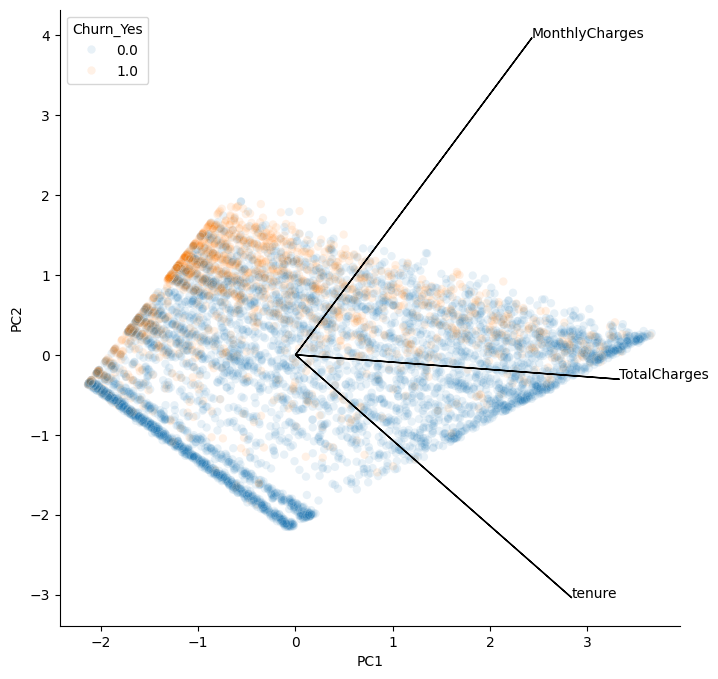

In [18]:
#. Data Visualization (PCA with feature vectors)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=True,
                        with_mean=True,)
df_scaled = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

pca = PCA()
pca.fit(df_scaled)

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax = sns.scatterplot(
                    x = pca.transform(df_scaled)[:,0],
                    y= pca.transform(df_scaled)[:,1],
                    alpha = .1,
                    # color = 'red',
                    hue = df.Churn_Yes,
                    )

ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for k in range(pca.components_.shape[1]):
  if k != 5:
    ax.arrow(0, 0, pca.components_[i,k]*5, pca.components_[j,k]*5)
    ax.text(pca.components_[i,k]*5,
            pca.components_[j,k]*5,

            ['tenure','MonthlyCharges','TotalCharges'][k])
  else:
    ax.arrow(0, 0, pca.components_[i,k]*5, pca.components_[j,k]*5)
    ax.text(pca.components_[i,k]*5,
            pca.components_[j,k]*5,

            ['tenure','MonthlyCharges','TotalCharges'][k])

In [19]:
#. UMAP ile veri boyutu azaltımı ve veri görselleştirme
#.   UMAP'ı uzak bilgisayara indirmek ve kurmak
!pip install UMAP-learn
import umap

In [20]:
df.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1.0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,2.0,53.85,108.15,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,45.0,42.30,1840.75,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,2.0,70.70,151.65,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [23]:
scaler = StandardScaler(with_std=True,
                        with_mean=True,)
df_scaled = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

#. Tenure, MonthlyCharges ve TotalCharges sütun başlıkları altındaki veriyi standardize değerlerle değiştirmek

df[['tenure','MonthlyCharges','TotalCharges']] = df_scaled

df.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1.0,0.0,-1.280248,-1.161694,-0.994194,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.064303,-0.260878,-0.173740,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,-1.239504,-0.363923,-0.959649,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.512486,-0.747850,-0.195248,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,-1.239504,0.196178,-0.940457,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [25]:
#. Boyut azaltıcı aracımı model adındaki değişkene atadım
model = umap.UMAP()

#. Modelimi elimdeki veriye uyarlıyorum
iki_boyutlu = model.fit_transform(df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

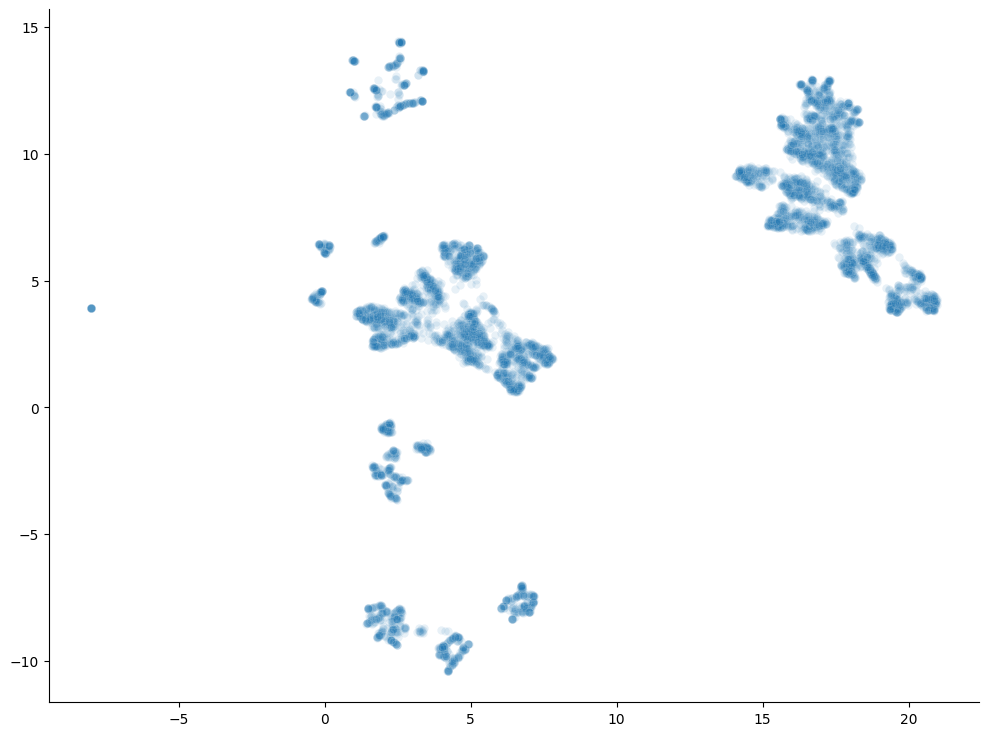

In [26]:
#. İki boyuta indirgenmiş orijinali 26 boyutlu olan görselim
sns.scatterplot(
x = iki_boyutlu[:,0],
y = iki_boyutlu[:,1],
alpha = 0.1
)